In [1]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import os
from bubbles import *
import plotly.express as px
import plotly.graph_objects as go
import cv2 as cv

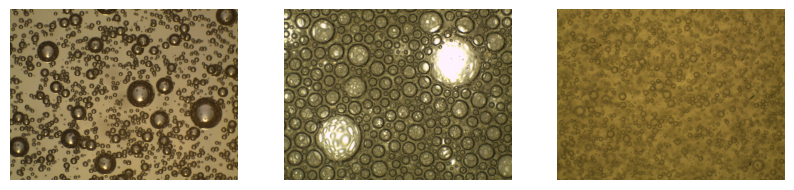

In [2]:
ims = import_photos_and_background('data')
plot_images([ims[0], ims[4], ims[5]])
grey = greyscale(ims)
parameters = {}

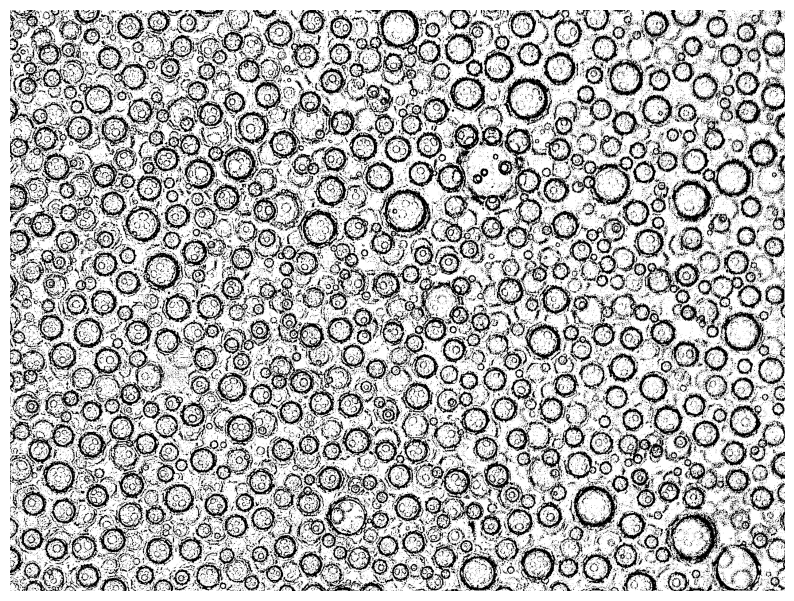

In [551]:
im = grey[2]
parameters['image_threshold'] = -0.04

norm = normalise_brightness(im)
sharpened = sharpen_image(norm)
thres_image = threshold_image(sharpened, parameters['image_threshold'])
plot_images(thres_image)

Filter the image using the bubble kernel set above.

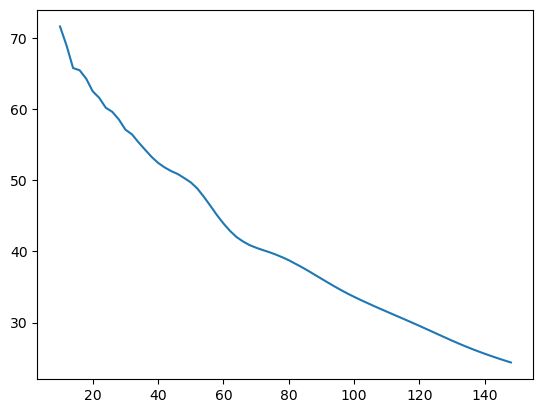

In [552]:
lower_bound = 10
upper_bound = 150
radius_rate = 2
parameters['sampling_params'] = [lower_bound, upper_bound, radius_rate]

constellation = compute_constellation(thres_image, parameters)

# _, cw = cv.threshold(constellation[-1], 0.75, 1, cv.THRESH_BINARY)
# fig, ax = plt.subplots(figsize = (15,15))
# ax.imshow(np.ones(im.shape))
# ax.imshow(thres_image, alpha=0.4)
# ax.imshow(cw, alpha = cw)

plt.plot(np.arange(lower_bound,upper_bound,radius_rate), [np.linalg.norm(c) for c in constellation])

Threshold each layer.

Radius: 120
Threshold: 0.14
Number: 1


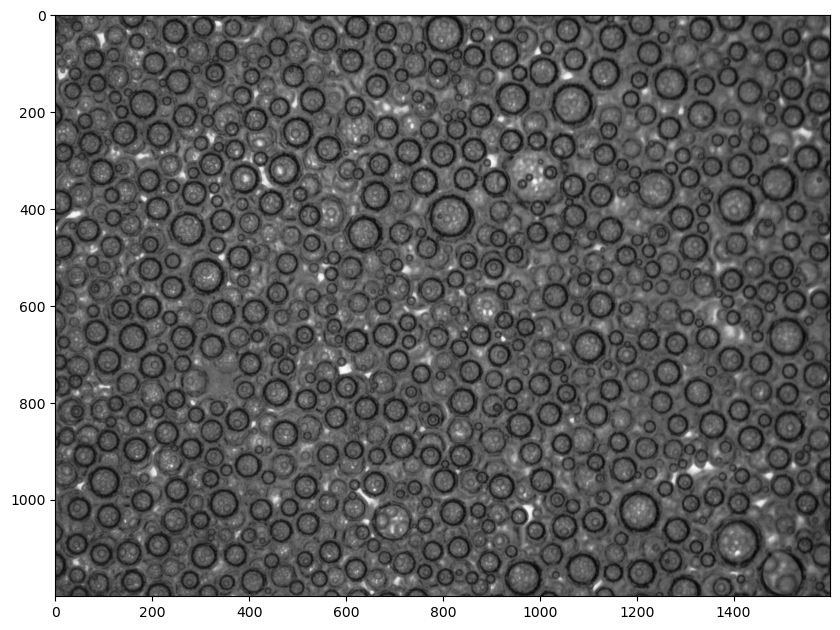

In [624]:
K = 55
thres = 0.13

Radius = np.arange(lower_bound, upper_bound, radius_rate)[K]
print('Radius:', Radius)
print('Threshold:', thres)
parameters['constellation_threshold'] = [thres,thres]
constellation_thres = threshold_constellation(constellation, parameters)

# Stack the radius layers into a single image.
# constellation_stack = stack_constellation(constellation_thres)

# Remove the tiny signals.
erosion_size = 2
# constellation_stack = erode(constellation_stack, erosion_size)
constellation_stack = erode(constellation_thres[K], erosion_size)

# Compute connected components (number and label of individual bubbles).
number, labels = cv.connectedComponents(constellation_stack, 8)
print('Number:', number)

centres = compute_bubble_centres(constellation_thres, 
                                 constellation_stack, 
                                 number, 
                                 labels, 
                                 parameters,
                                 verbose=False)
plot_bubbles_on_image(im, centres)

plt.savefig('data/examples/eg.png', dpi = 200)

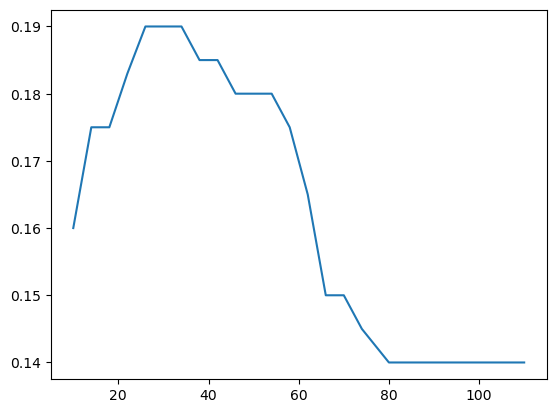

In [623]:
image1.append([Radius, thres])
plt.plot(np.array(image1)[:,0],np.array(image1)[:,1])

In [586]:
image1[-1]

[34, 0.19]

In [559]:
def plot_bubbles_on_image(im, centres):
    fig, ax = plt.subplots(figsize = (10,10))
    ax.imshow(im)
    for centre in centres:
        y, x, r = centre
        circle = plt.Circle((x, y), r, color='r', alpha = 0.25, fill=False)
        ax.add_patch(circle)

Compute bubble centres and radii from the constellation stack.

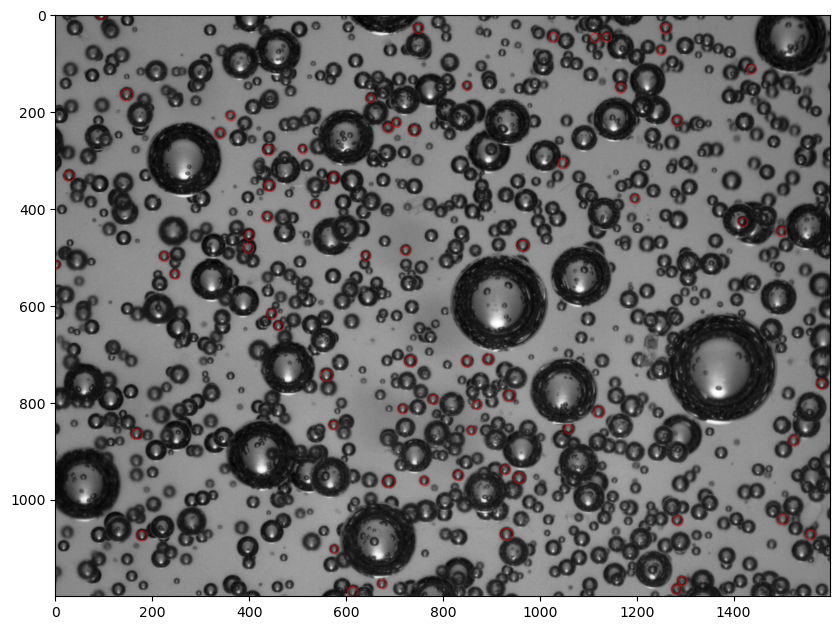

In [143]:
centres = compute_bubble_centres(constellation_thres, 
                                 constellation_stack, 
                                 number, 
                                 labels, 
                                 parameters,
                                 verbose=False)
# centres = remove_contained_bubbles(centres)

# new_bubble_kernel = empirical_kernel(im, centres)
# plt.imshow(new_bubble_kernel)
plot_bubbles_on_image(im, centres)
# plt.savefig('data/examples/eg.png', dpi = 200)

<function bubbles.bubble_kernel(params, N)>

In [38]:
rads = centres[:,2]
rads = rads[~np.isnan(rads)]
rads.sort()
np.cumsum(rads)
# plt.plot(np.cumsum(rads))

freq, bins = np.histogram(rads, bins=25)
bin_width = bins[1]-bins[0]
bin_centres = bins[:-1] - bin_width/2
freq = freq / (freq.sum() * bin_width)

fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylim(0, freq.max())
ax.plot(bin_centres,freq)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

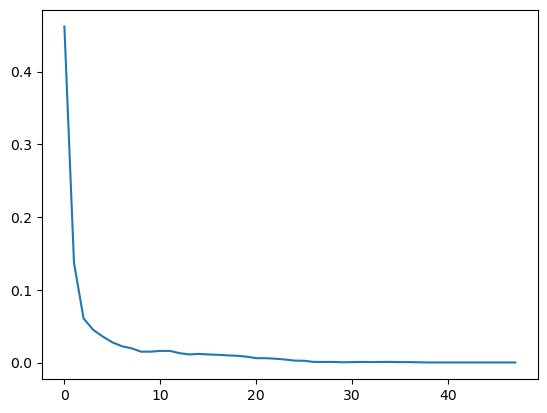

In [116]:
conv_dist = np.linalg.norm(constellation_thres, axis = (1,2))
conv_dist_l1 = np.mean(np.abs(constellation_thres), axis = (1,2))
# conv_dist -= conv_dist[20]

plt.plot(dist)

# fig, ax = plt.subplots(figsize = (10,10))
# ax.plot(bin_centres,freq)
# ax.plot(xx, conv_dist/conv_dist.sum())
# ax.plot(xx, conv_dist_l1 / conv_dist_l1.sum())
# ax.plot(xx, dist)
# ax.legend(['Histogram of computed bubble radii',
#            'L2 Norm of constellation heatmap',
#            'L1 Norm of constellation heatmap',
#            'Connected component distribution of constellation heatmap'])

# fig, ax = plt.subplots(1,3, figsize = (15,5), sharex = True, sharey=True)
# ax[0].set_xlim(0,100)
# ax[0].plot(bin_centres,freq)
# ax[0].set_title('Histogram of computed bubble radii')
# ax[1].plot(xx, conv_dist/conv_dist.sum())
# ax[1].set_title('Norm of constellation heatmap')
# ax[2].plot(xx, dist)
# ax[2].set_title('Connected component distribution \n of constellation heatmap')

In [168]:
dist

NameError: name 'dist' is not defined

[1238.0, 39.0, 10.0]


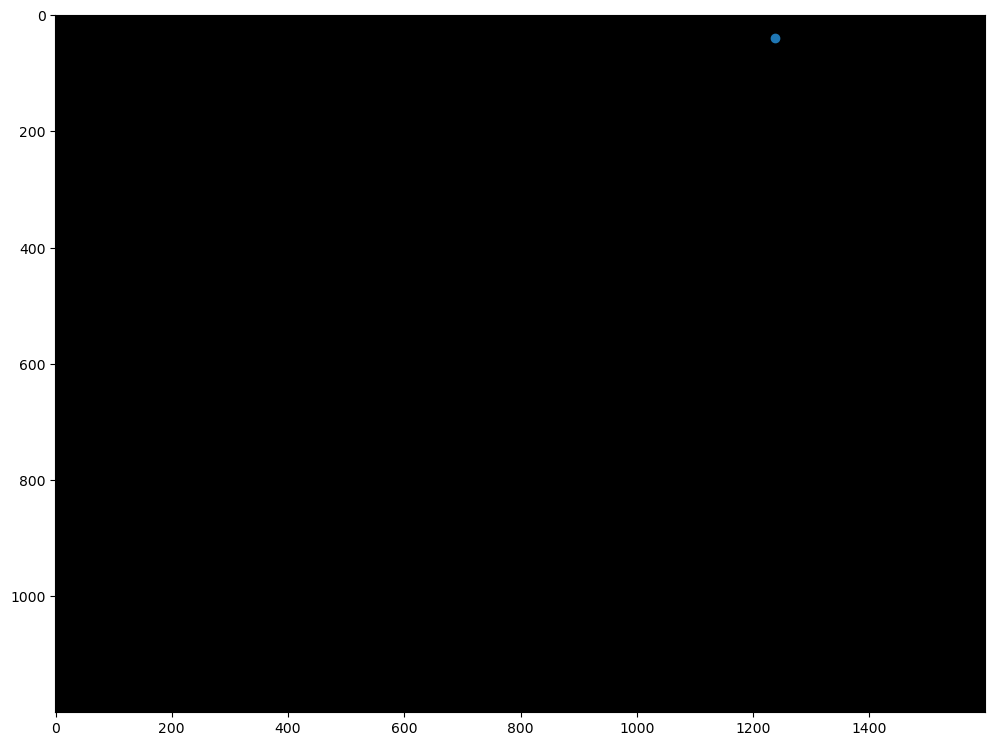

In [ ]:
mask = labels == 100

cluster = np.transpose((constellation_thres * mask).nonzero())
r, y, x = np.median(cluster, axis = 0)
centre = [x, y, r]
print(centre)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(labels==100)
ax.scatter(centre[0], centre[1])

(1200, 12800)

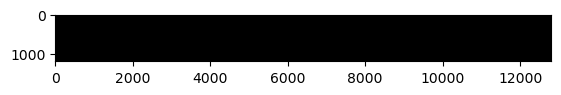

In [ ]:
plt.imshow(labels == 1)
thres_layer = constellation_thres[40]
thres_layer.dtype = np.uint8
# number, labels = cv.connectedComponents(thres_layer, 8)

thres_layer.shape

{(0, 18, 20): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x22c85be80>,
 (0, 18, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2445986a0>,
 (0, 52, 23): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x244598a30>,
 (1, 0, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x244598dc0>,
 (1, 0, 88): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb190>,
 (1, 2, 97): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb520>,
 (1, 9, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb8b0>,
 (1, 25, 52): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cbc40>,
 (1, 26, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cbfd0>,
 (1, 56, 8): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531db3a0>,
 (2, 0, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531db730>,
 (2, 23, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531dbac0>,
 (2, 28, 20): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531dbe50>,
 (2, 70, 20): <mpl_

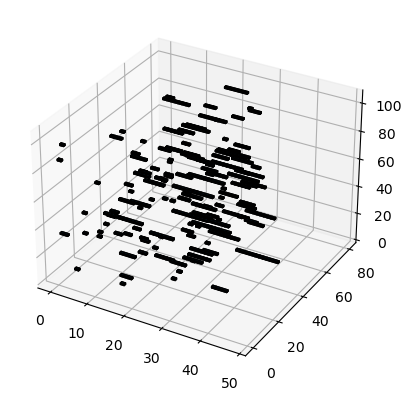

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(constellation_thres[:,::15,::15], edgecolor='k')

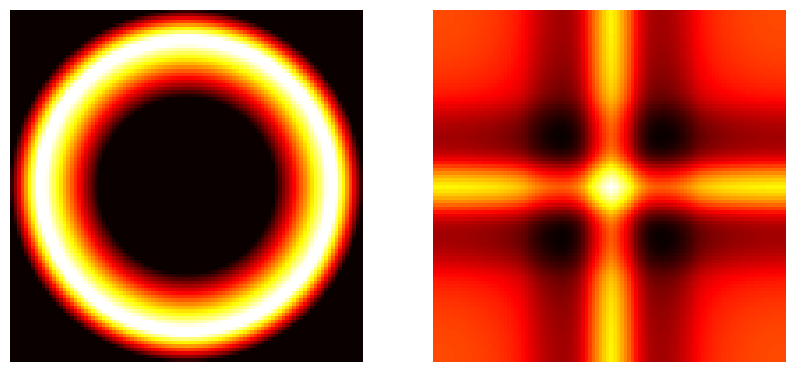

In [ ]:
bubbleker = bubble_kernel([0.5,0.8,0.85,1], 100)
bubbleker1 = bubble_kernel([0.5,0.8,0.85,1], 100)
 
identity = cv.filter2D(src=bubbleker1, ddepth=-1, kernel=bubbleker)

plot_images([bubbleker1, identity], cmap = 'hot')